In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# ------------------------------
# 1.1. Load and Inspect Data
# ------------------------------
# Load the dataset
df = pd.read_csv('data\Shanghai license plate price - Sheet3.csv')
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces from column names

# Display column names
print("Dataset Columns:")
print(df.columns.tolist())
print("\n")

# Display dataset information
print("Dataset Information:")
df.info()
print("\n")

# Display summary statistics
print("Summary Statistics:")
print(df.describe())
print("\n")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Display first few rows of the dataset
print("First 5 Rows of the Dataset:")
print(df.head())
print("\n")



Dataset Columns:
['Date', 'Total number of license issued', 'lowest price', 'avg price', 'Total number of applicants']


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date                            204 non-null    object
 1   Total number of license issued  204 non-null    int64 
 2   lowest price                    204 non-null    int64 
 3   avg price                       204 non-null    int64 
 4   Total number of applicants      204 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.1+ KB


Summary Statistics:
       Total number of license issued  lowest price     avg price  \
count                      204.000000    204.000000    204.000000   
mean                      7634.323529  53375.000000  54358.044118   
std                       2615.136371  24577.035068  23

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Max\AppData\Local\Temp\ipykernel_11108\1056829083.py:5: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('data\Shanghai license plate price - Sheet3.csv')


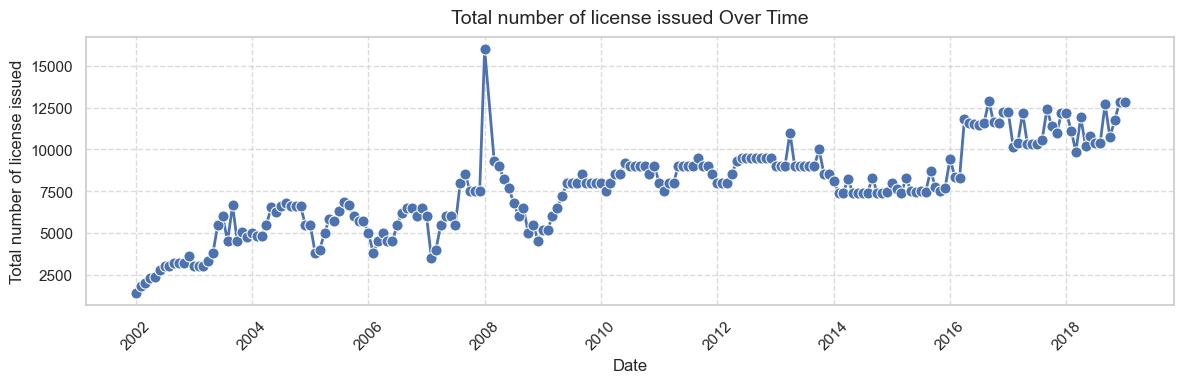

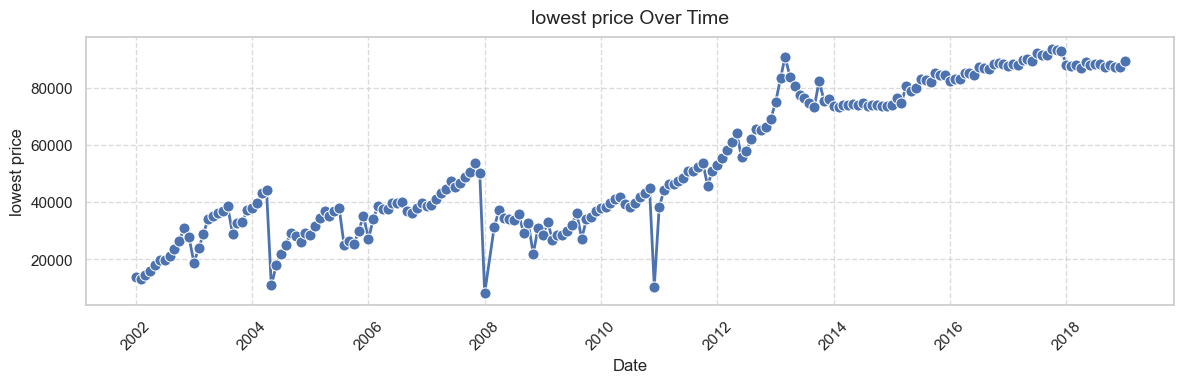

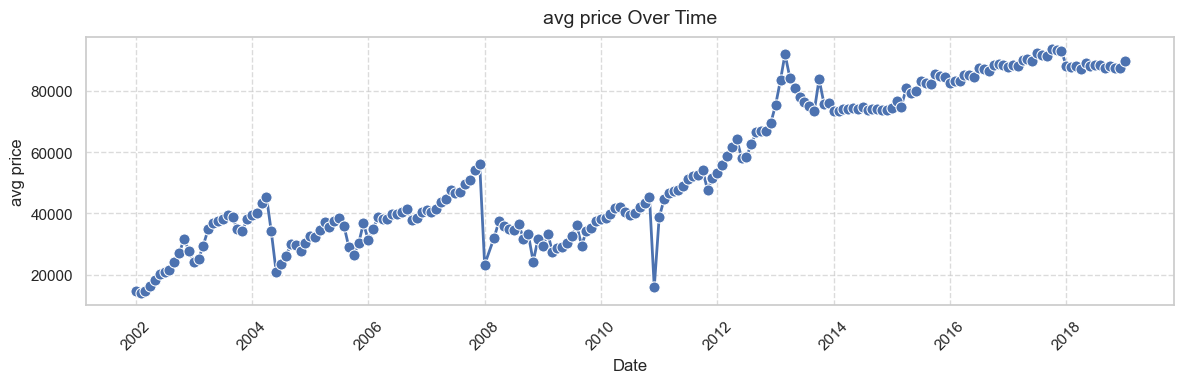

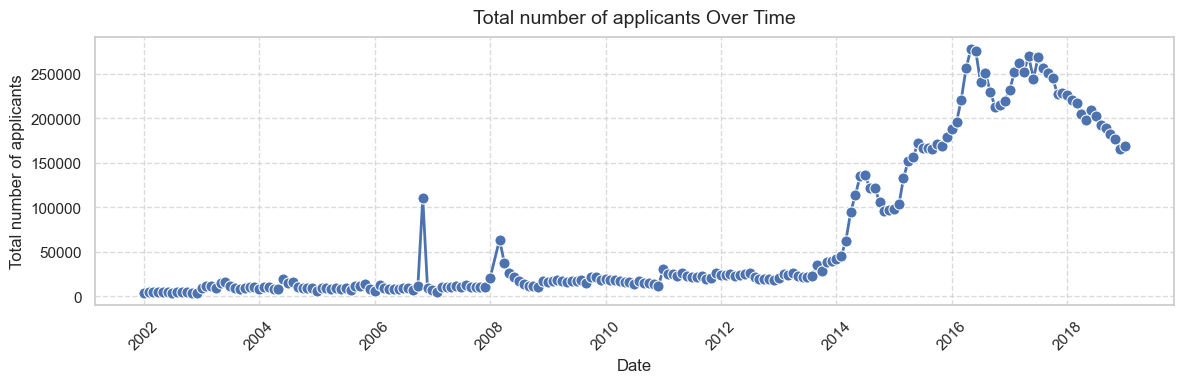

In [ ]:
# ------------------------------
# 1.2. Visualize Individual Columns
# ------------------------------
# Set seaborn style for consistent and clean plotting
sns.set(style="whitegrid", rc={'figure.dpi': 100, 'figure.figsize': (12, 4)})

# Plot each numeric column over time
numeric_cols = [col for col in df.columns if col != 'Date']
for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x='Date', y=col, marker='o', linewidth=2, markersize=8)
    plt.title(f'{col} Over Time', fontsize=14, pad=10)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

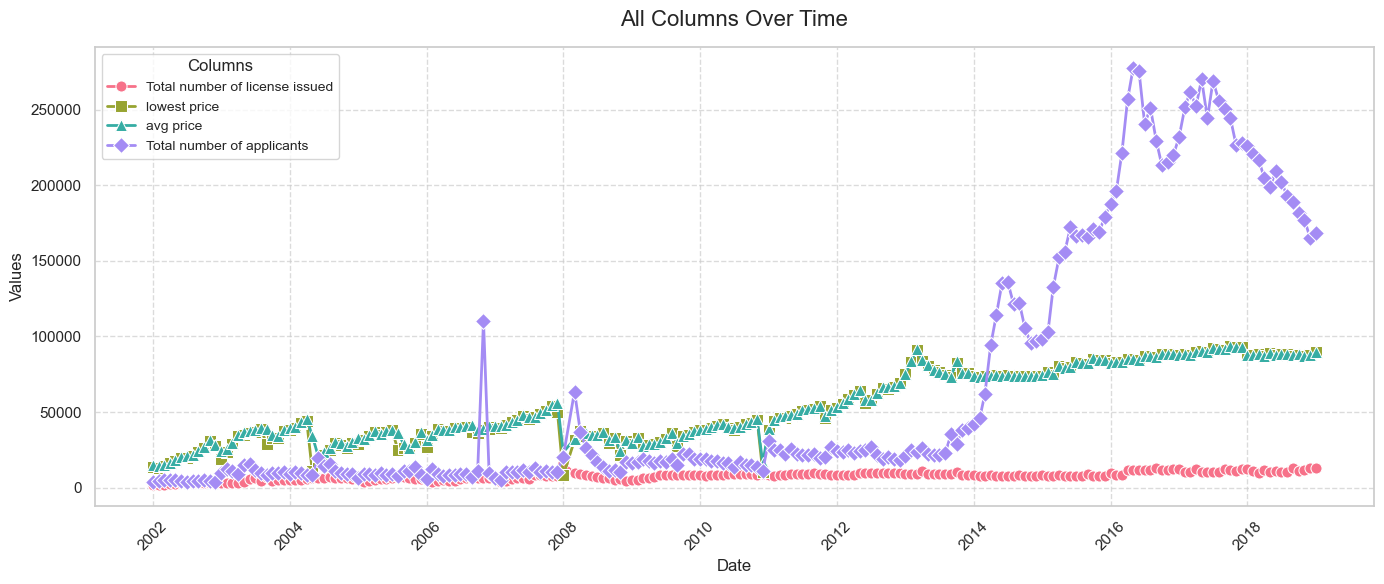

In [ ]:
# ------------------------------
# 1.3. Combined Plot for All Columns
# ------------------------------
# Define markers and colors for each column
markers = ['o', 's', '^', 'D', 'x', 'p']
colors = sns.color_palette("husl", len(numeric_cols))  # Use distinct colors from husl palette

# Create a combined line plot
plt.figure(figsize=(14, 6))
for col, marker, color in zip(numeric_cols, markers, colors):
    sns.lineplot(data=df, x='Date', y=col, marker=marker, label=col, 
                 linewidth=2, markersize=8, color=color)

# Customize the combined plot
plt.title('All Columns Over Time', fontsize=16, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Columns', loc='best', fontsize=10, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# ------------------------------
# 2. Split Data into Training and Validation Sets
# ------------------------------
from sklearn.model_selection import train_test_split, KFold

# Parameters
TARGET = 'avg price'
TEST_SIZE = 0.2
RANDOM_STATE = 42
N_SPLITS = 4 #4 щоб кількість елементів в фолді нормально рахувалась, в нас всього 204 записи, при інших значеннях буде помилка в кількотсі елеметів в фолді
SHUFFLE = True

# Підготовка даних
X = df.drop(['Date', TARGET], axis=1).copy()
y = df[TARGET].copy()

# Якщо потрібна лог-трансформація applicants — розкоментуйте цей рядок і перезапустіть сел
# X['Total number of applicants'] = np.log1p(X['Total number of applicants'])

# 1) Simple hold-out (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=SHUFFLE
)

print('Hold-out:')
print('  Training set shape:', X_train.shape, y_train.shape)
print('  Validation set shape:', X_val.shape, y_val.shape)
print('='*40)

# 2) K-Fold на усіх даних (створюємо фолди для навчання/валідації)
kf = KFold(n_splits=N_SPLITS, shuffle=SHUFFLE, random_state=RANDOM_STATE)

folds = []  # сюди зберігатимемо фолди у форматі (X_train_k, X_val_k, y_train_k, y_val_k)

for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X), start=1):
    X_train_k = X.iloc[train_idx].reset_index(drop=True)
    X_val_k   = X.iloc[val_idx].reset_index(drop=True)
    y_train_k = y.iloc[train_idx].reset_index(drop=True)
    y_val_k   = y.iloc[val_idx].reset_index(drop=True)
    
    folds.append((X_train_k, X_val_k, y_train_k, y_val_k))
    
    print(f"Fold {fold_idx}:")
    print("  Train shape:", X_train_k.shape, y_train_k.shape)
    print("  Validation shape:", X_val_k.shape, y_val_k.shape)
    print('-'*30)

# Тепер 'folds' — список з N_SPLITS елементів, кожен — кортеж (X_train_k, X_val_k, y_train_k, y_val_k)
# Приклад доступу до першого фолда:
# X_tr0, X_val0, y_tr0, y_val0 = folds[0], всього 4 фолди: folds[0] ... folds[3]

Hold-out:
  Training set shape: (163, 3) (163,)
  Validation set shape: (41, 3) (41,)
Fold 1:
  Train shape: (153, 3) (153,)
  Validation shape: (51, 3) (51,)
------------------------------
Fold 2:
  Train shape: (153, 3) (153,)
  Validation shape: (51, 3) (51,)
------------------------------
Fold 3:
  Train shape: (153, 3) (153,)
  Validation shape: (51, 3) (51,)
------------------------------
Fold 4:
  Train shape: (153, 3) (153,)
  Validation shape: (51, 3) (51,)
------------------------------


В селі нижче треба виконати пункт.
11.Спробувати виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.

In [ ]:
# ------------------------------
# 3. SVR Regression (Polynomial Kernel)
# ------------------------------
from sklearn.svm import SVR

# SVR parameters (MUST BE TUNED)
degree = 4     # Typical values: 2, 3, 4
epsilon = 0.2 # Typical values: 0.01, 0.1, 0.2
C = 2         # Typical values: 0.1, 1, 10

# Fit SVR on hold-out split (без перевірки)
svr_poly = SVR(kernel='poly', degree=degree, epsilon=epsilon, C=C)
svr_poly.fit(X_train, y_train)

# --- SVR on K-Fold splits (без перевірки) ---
svr_folds = []
for fold_idx, (X_train_k, X_val_k, y_train_k, y_val_k) in enumerate(folds, start=1):
    svr_k = SVR(kernel='poly', degree=degree, epsilon=epsilon, C=C)
    svr_k.fit(X_train_k, y_train_k)
    svr_folds.append(svr_k)

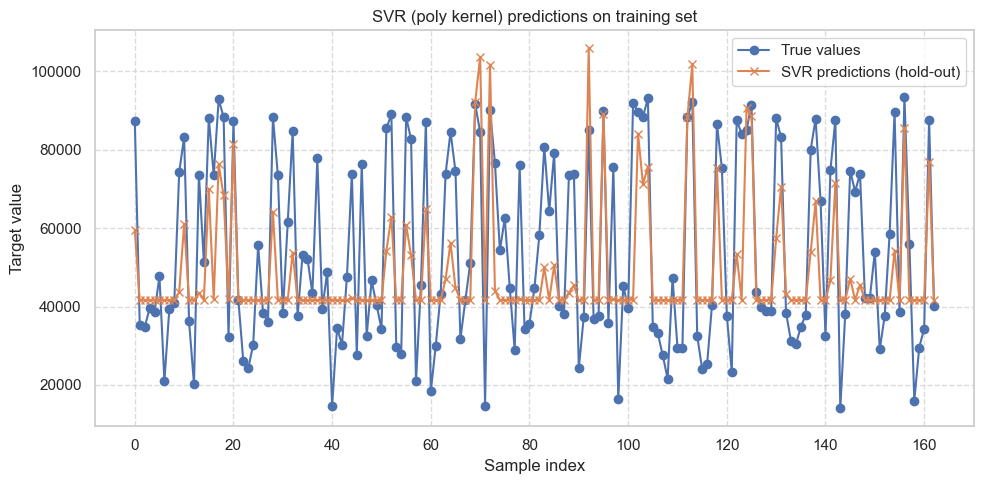

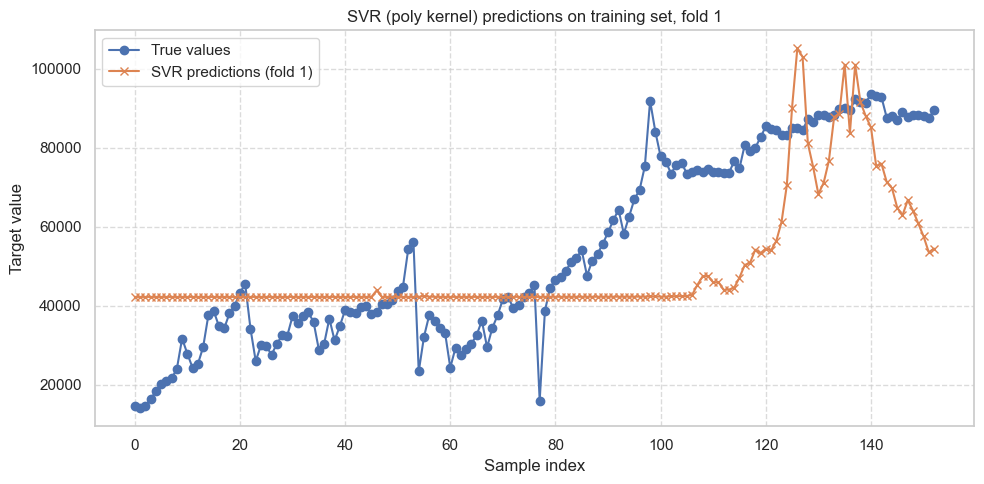

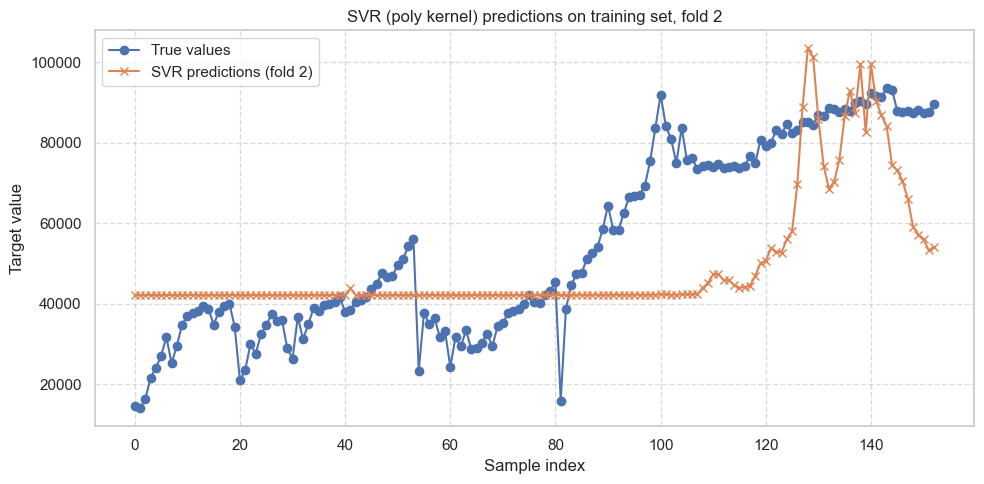

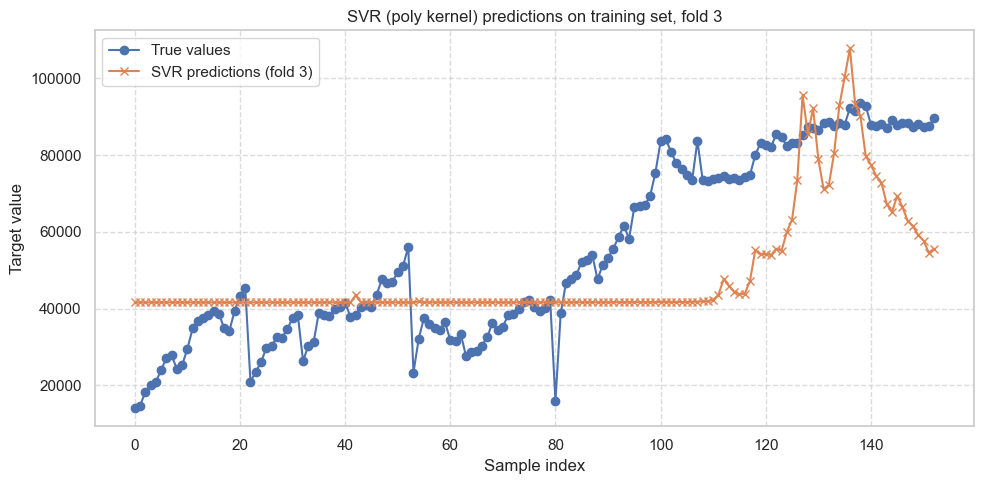

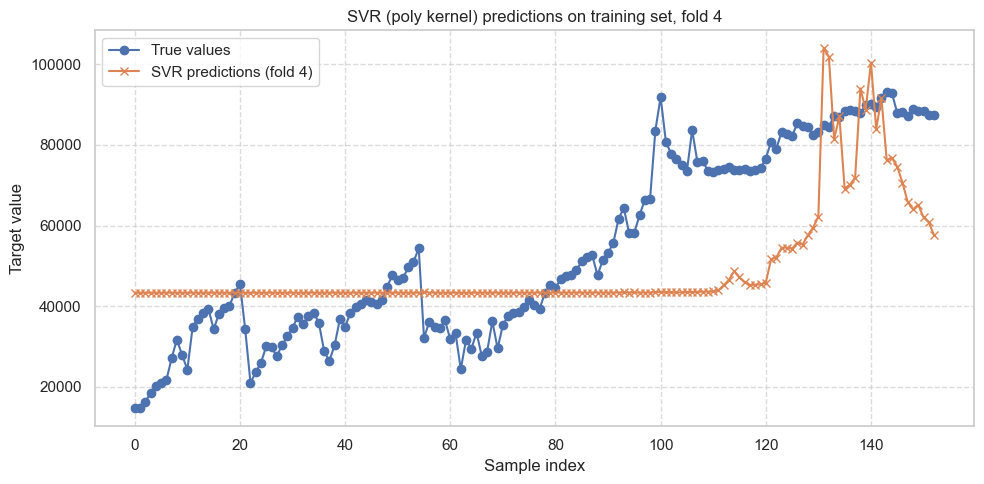

In [ ]:
# ------------------------------
# 4. Visualization of SVR 
# ------------------------------
import matplotlib.pyplot as plt

# Visualization for hold-out SVR
y_pred_holdout = svr_poly.predict(X_train)
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_train)), y_train, label='True values', marker='o')
plt.plot(range(len(y_train)), y_pred_holdout, label='SVR predictions (hold-out)', marker='x')
plt.title('SVR (poly kernel) predictions on training set')
plt.xlabel('Sample index')
plt.ylabel('Target value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization for folds
for fold_idx, (svr_k, (X_train_k, X_val_k, y_train_k, y_val_k)) in enumerate(zip(svr_folds, folds), start=1):
    y_pred_k = svr_k.predict(X_train_k)
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(y_train_k)), y_train_k, label='True values', marker='o')
    plt.plot(range(len(y_train_k)), y_pred_k, label=f'SVR predictions (fold {fold_idx})', marker='x')
    plt.title(f'SVR (poly kernel) predictions on training set, fold {fold_idx}')
    plt.xlabel('Sample index')
    plt.ylabel('Target value')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()